In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
!python --version

Python 3.10.12


In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_images, train_labels)
print(test_images, test_labels)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

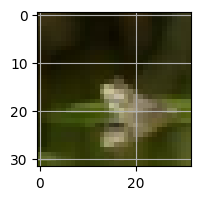

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[25000], cmap=plt.cm.binary)
plt.grid(True)
plt.show()

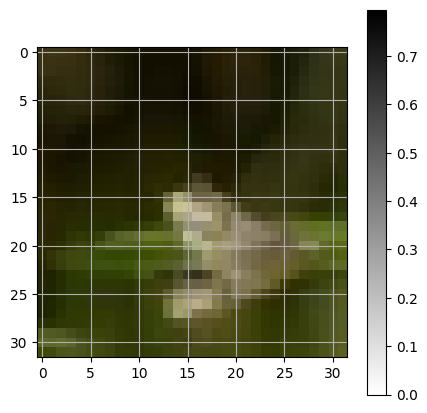

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[25000], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(512, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3678 - loss: 1.7016 - val_accuracy: 0.5835 - val_loss: 1.1693
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6049 - loss: 1.1175 - val_accuracy: 0.6343 - val_loss: 1.0433
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6795 - loss: 0.9112 - val_accuracy: 0.6759 - val_loss: 0.9294
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7232 - loss: 0.7939 - val_accuracy: 0.6894 - val_loss: 0.8964
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7598 - loss: 0.6850 - val_accuracy: 0.7053 - val_loss: 0.8539
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7865 - loss: 0.6016 - val_accuracy: 0.7297 - val_loss: 0.8284
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8116 - loss: 0.5342 - val_accuracy: 0.7170 - val_loss: 0.8479
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8340 - loss: 0.465

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.7254 - loss: 0.9379

Test accuracy: 0.7253999710083008


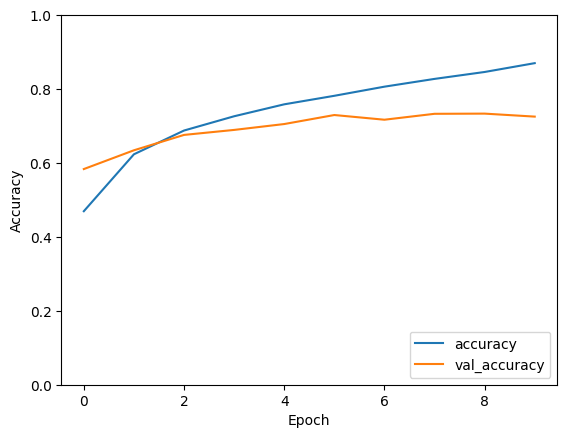

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


When comparing Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) for the CIFAR-10 dataset, several key differences emerge due to the nature of the dataset and the architecture's suitability for image-based tasks.

For image-based datasets like CIFAR-10, CNNs are far more effective and efficient than ANNs, achieving higher accuracy and computational efficiency by leveraging their architecture's ability to process spatial data.

## **Why CNNs Perform Better on CIFAR-10**

Spatial Awareness: CNNs maintain spatial relationships in images, which is crucial for tasks like object recognition.
Efficient Feature Extraction: Convolutional layers identify important features like edges and textures, building a hierarchy of complex patterns.
Weight Sharing: Reduces the number of parameters, making CNNs more efficient and less prone to overfitting compared to ANNs.